 # Συνέχεια με Pandas

In [1]:
import numpy as np
import pandas as pd

## Πρόβλημα με τιμές που λείπουν 

Πολλές φορές λείπουν τιμές από τα δεδομένα μας, είναι 0, *, κενά, Δεν Γνωρίζω,n/a,999 κ.λπ. Αυτά πρέπει να μάθουμε τον τρόπο να τα διαχειριζόμαστε χωρίς να μας δημιουργούν πρόβλημα στην ανάλυση. 

Υπάρχουν 2 τρόποι που εμφανίζονται στα Pandas

    • None για συμβολοσειρές 
    • NaN: ‘Not a Number’, για αριθμούς

In [19]:
poleis = {"onoma": ["Athina", "Thessaloniki", "Patra", "Irakleio", "Larisa"],
"plithismos": [3218218, None, 168202, 153653, 144651],
"diamerisma": ["Sterea_Ellada", None, "Peloponissos", "Kriti", "Thessalia"]}
df_ellada = pd.DataFrame(poleis)


Για να βρούμε τις τιμές που λείπουν χρησιμοποιούμε τις λειτουργίες .isnull() και .notnull()

In [20]:
df_ellada.isnull() # επιστρέφει έναDataFrame με Boolean

,onoma,plithismos,diamerisma
0,False,False,False
1,False,True,True
2,False,False,False
3,False,False,False
4,False,False,False


In [21]:
df_ellada.notnull()

,onoma,plithismos,diamerisma
0,True,True,True
1,True,False,False
2,True,True,True
3,True,True,True
4,True,True,True


Για τον συνολικό αριθμό των τιμών που λείπουν

In [22]:
df_ellada.isnull().sum()

onoma         0
plithismos    1
diamerisma    1
dtype: int64

Μπορούμε να φτιάξουμε μια λίστα με τα ονόματα των τιμών που λείπουν, αν ξέρουμε π.χ. ότι στο συγκεκριμένο αρχείο οι κενές τιμές είναι 999 και --, και να τις μετατρέψουμε απευθείας σε nan που αντιλαμβάνεται η Python, κατά την ώρα που φορτώνουμε το  αρχείο.  

    missing_values = ["n/a", "na", "--", 999] 

    df_data = pd.read_csv("file.csv", na_values = missing_values)

Εναλλακτικά μπορούμε να κάνουμε .replace():

In [25]:
poleis = {"onoma": ["-", "Thessaloniki", "-", "Irakleio", "Larisa"],
"plithismos": [3218218, "-", 168202, 153653, 144651],
"diamerisma": ["Sterea_Ellada", "-", "Peloponissos", "Kriti", "Thessalia"]}
df_ellada = pd.DataFrame(poleis)


In [26]:
df_ellada.replace("-", np.nan)

,onoma,plithismos,diamerisma
0,NaN,3218218.0,Sterea_Ellada
1,Thessaloniki,NaN,NaN
2,NaN,168202.0,Peloponissos
3,Irakleio,153653.0,Kriti
4,Larisa,144651.0,Thessalia


Μερικές ακόμη λειτουργίες για κενές τιμές:
    
    • .dropna()
    • .fillna()
    • .replace()
    • .interpolate()
    
Μπορούμε να αλλάξουμε:

    • axis = 0/1
    • inplace = True 
    
Με το inplace = True μέσα στην παρένθεση, εννοούμε να μην φτιάξει νέο αντίγραφο το DataFrame, αλλά να κρατήσει τις αλλαγές. 

Για υπολογισμούς, μπορούμε να χρησιμοποιήσουμε το skipna=True και να μην ληφθούν υπόψιν οι κενές τιμές. 

##  Σβήσιμο 

In [2]:
katataxi = ["proti", "deuteri", "triti", "tetarti", "pempti"]
poleis = {"onoma": ["Athina", "Thessaloniki", "Patra", "Irakleio", "Larisa"],
"plithismos": [3218218, 789191, 168202, 153653, 144651],
"diamerisma": ["Sterea_Ellada", "Makedonia", "Peloponissos", "Kriti", "Thessalia"]}
df_poleis = pd.DataFrame(poleis, index=katataxi)

In [3]:
df_poleis.head()

,onoma,plithismos,diamerisma
proti,Athina,3218218,Sterea_Ellada
deuteri,Thessaloniki,789191,Makedonia
triti,Patra,168202,Peloponissos
tetarti,Irakleio,153653,Kriti
pempti,Larisa,144651,Thessalia


Για να σβήσουμε μία γραμμή μπορούμε είτε να χρησιμοποιήσουμε το drop ή το delete:

    • Drop 'ρίξε' το row με βάση τη θέση του

In [4]:
df_new= df_poleis.drop(['proti'])

    • Drop 'ρίξε' το row με βάση τo index 

In [5]:
df1 = df_poleis.drop(df_poleis.index[3])

    • Drop 'ρίξε' το row με βάση μια συνθήκη

In [6]:
df2 = df_poleis[df_poleis.onoma != "Larisa"]

#### Σβήσιμο στηλών
 
    • Drop 'ρίξε' με βάση το όνομα της στήλης

In [7]:
df_4 = df_poleis.drop('diamerisma', axis = 1)

    • Drop 'ρίξε' με βάση το index

In [8]:
df_5 = df_poleis.drop(df_poleis.columns[1], axis = 1)

    • Σβήσιμο του column name 

In [9]:
del df_poleis ['diamerisma']

Ορίζοντας την παράμετρο axis αλλάζει ο τρόπος που σβήνουμε. 

    o axis= 0 --> rows
    
    o axis= 1 --> columns

### Εισαγωγή αρχείων

Για να φέρουμε ένα CSV, excel αρχείο σε ένα DataFrame χρησιμοποιούμε τη λειτουργία "read_csv" και ορίζουμε το Path και καμιά φορά τον διαχωριστή των στοιχείων sep= (',') , π.χ. είναι το  ','  ή  το  \t  ή ';':

    • pd.read_csv(“φάκελος/άλλος_φάκελος/όνομα_αρχείου.csv”)
    
Επειδή πολλές φορές σε αρχεία csv και excel οι ερευνητές γράφουν σημειώσεις στην αρχή και αυτό δεν μπορεί να φορτωθεί σωστά στο DataFrame, είτε ορίζετε το header, π.χ. header = 0, ή skiprows = 1 κ.λπ.

*Παράδειγμα*:

    df = pd.read_csv("data.csv",sep="\t") 
    df = pd.read_excel (‘data.xlsx')
Για ένα συγκεκριμένο φύλλο από ένα excel με πολλά φύλλα:

    df = pd.read_excel (‘data.xlsx', sheet_name= “πληθυσμός_2011”)
    
    df_text = pd.read_csv("data.txt", sep = ",")

### Εξαγωγή αρχείων

για CSV:
    
    • data.to_csv(“όνομα.csv”)
Excel file:

    • data.to_excel (“όνομα.xlsx”)

In [28]:
df_data = pd.DataFrame(
{"onoma": ["Athina", "Thessaloniki", "Patra", "Irakleio", "Larisa"],
"plithismos": [3218218, 789191, 168202, 153653, 144651],
"diamerisma": ["Sterea_Ellada", "Makedonia", "Peloponissos", "Kriti", "Thessalia"]})
df_data.to_csv('poleis.csv')

# Πακέτο για γραφήματα! Μatplotlib

https://matplotlib.org/gallery/index.html

![Image of operators](https://pythonforundergradengineers.com/posts/matplotlib/images/four_logos.png)

Τώρα μπορούμε να οπτικοποιήσουμε όσα έχουμε μάθει μέχρι στιγμής.

Αρχικά καλούμε όλα τα πακέτα.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Απλό γραμμικό διάγραμμα (Line plot)

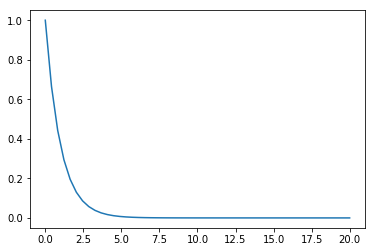

In [35]:
something = np.linspace(0, 20, 50)
somenthing_else = np.exp(-a)
plt.plot(something, somenthing_else)
plt.show()


Ιστόγραμμα (Histogram)

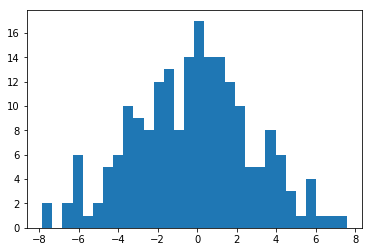

In [36]:
x = 3*np.random.randn (200)
plt.hist(x, bins=30)
plt.show()

Διάγραμμα Διασποράς (Scatter plot)

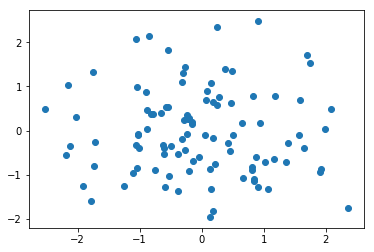

In [38]:
a = np.random.randn (100)
d = np.random.randn (100)
plt.scatter(a, d)
plt.show()